In [27]:
import numpy as np
import tensorflow as tf
rs = np.random.RandomState(627372)
n = 1000
X = rs.randn(n, 3)
# Note: true coefficients are [2, 1, 0].
Y = ((2* X[:, 0] + X[:, 1]) * 3 + rs.randn(n))[:, np.newaxis]

In [28]:
X

array([[-0.0386513 ,  1.36557739, -0.30872646],
       [-0.53849921, -1.0250927 ,  0.55339441],
       [-1.3882402 ,  0.64667233,  1.63689121],
       ...,
       [-0.08901053,  1.08329343, -0.61857246],
       [-0.70806741, -0.91802775, -1.17342061],
       [-0.1131507 ,  0.00224042, -0.47070961]])

In [29]:
# splitting data into training set and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [30]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

# creating column transformer (this will help us normalize/preprocess our data)

scaler = MinMaxScaler()

In [31]:
# fitting column transformer on training data
scaler.fit(X_train)

# transforming training and test data with normalizing (MinMaxScaler) and one hot encodig (OneHotEncoder)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
# creating a model using the Sequential API

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

# compiling the model
model.compile(loss = tf.keras.losses.mae, optimizer = tf.keras.optimizers.Adam(lr = 0.01), metrics = ['mae'])

# fit the model
model_history = model.fit(X_train, y_train, epochs = 500)

Epoch 1/500
25/25 [==============================] - 1s 2ms/step - loss: 5.6355 - mae: 5.6355
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 5.6276 - mae: 5.6276
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 5.6207 - mae: 5.6207
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 5.6139 - mae: 5.6139
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 5.6080 - mae: 5.6080
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 5.6013 - mae: 5.6013
Epoch 7/500
25/25 [==============================] - 0s 2ms/step - loss: 5.5955 - mae: 5.5955
Epoch 8/500
25/25 [==============================] - 0s 2ms/step - loss: 5.5896 - mae: 5.5896
Epoch 9/500
25/25 [==============================] - 0s 2ms/step - loss: 5.5842 - mae: 5.5842
Epoch 10/500
25/25 [==============================] - 0s 2ms/step - loss: 5.5786 - mae: 5.5786
Epoch 11/500
25/25 [==============================] - 0s 2m

In [33]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 4.1832 - mae: 4.1832


[4.183187484741211, 4.183187484741211]

In [34]:
pdcts = model.predict(X_test)
pdcts

7/7 [==============================] - 0s 2ms/step


array([[ 1.3385234 ],
       [-0.8026242 ],
       [ 1.6123762 ],
       [-0.1981237 ],
       [-0.2761283 ],
       [-0.09701943],
       [ 1.7006178 ],
       [ 0.1283319 ],
       [ 1.2959933 ],
       [-0.48826838],
       [ 1.1013556 ],
       [ 1.7934055 ],
       [ 2.5963578 ],
       [-0.01503897],
       [-0.6347554 ],
       [-0.12043667],
       [ 1.66116   ],
       [-0.24112225],
       [-0.25385523],
       [ 0.50349426],
       [-0.70237565],
       [ 1.4260025 ],
       [ 3.5453029 ],
       [-0.3139193 ],
       [ 1.555891  ],
       [ 2.5624385 ],
       [ 1.7900405 ],
       [ 0.12944508],
       [ 1.3493934 ],
       [-1.2827756 ],
       [ 2.3392935 ],
       [-0.5515852 ],
       [ 1.0400724 ],
       [-0.02607512],
       [-0.32045984],
       [ 1.5732093 ],
       [ 1.5540357 ],
       [ 1.6264405 ],
       [ 1.9952321 ],
       [ 3.0871892 ],
       [-0.19359732],
       [ 2.2822776 ],
       [ 1.4907985 ],
       [-2.717633  ],
       [ 1.3964882 ],
       [ 2

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

def plot_horsepower(x, y):
  plt.scatter([x for x in range(200)], pdcts, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.legend()

In [36]:
x = tf.linspace(0.0, 199, 200)

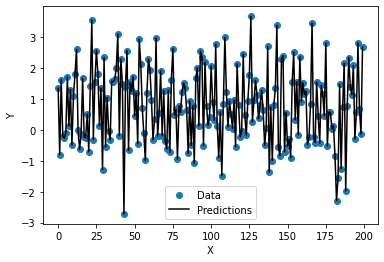

In [37]:
plot_horsepower(x, pdcts)